In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests as requests
import time


In [74]:
data = pd.read_csv(r'C:\Users\pabli\Desktop\Health-Database\data\full_data2.csv')

In [75]:
data.shape

(3580, 2330)

In [45]:
def check_nan(data: pd.DataFrame) -> None:
    
    nan_cols=data.isna().mean() * 100  # el porcentaje
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

    sns.heatmap(data.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)

    plt.show()

In [174]:
nan_cols=data.isna().mean() * 100

In [92]:
nan_cols

Unnamed: 0.2                                                                                      0.000000
Unnamed: 0.1                                                                                      0.000000
Unnamed: 0                                                                                        0.000000
country                                                                                           0.000000
country_code                                                                                      0.000000
                                                                                                    ...   
Proportion of population with primary reliance on clean fuels and technologies for cooking (%)    2.793296
Mean Non-HDL cholesterol, age-standardized                                                        6.592179
Number of non-pregnant women (aged 15-49 years) with anaemia (thousands)                          1.117318
Prevalence of anaemia in pregnant wom

In [149]:
data.drop(columns=nan_cols[nan_cols>40].index, inplace=True)

In [150]:
data.shape

(3540, 190)

In [153]:
nan_cols[nan_cols>40].index

Index([], dtype='object')

In [79]:
list1= ['Reported number of children receiving antiretroviral therapy','Estimated number of pregnant women living with HIV needing antiretrovirals for preventing mother-to-child transmission',
       'Estimated number of children needing antiretroviral therapy based on WHO methods',
       'Estimated antiretroviral therapy coverage among children','Nursing and midwifery personnel  (number)',
       'Nursing personnel (number)','Pharmacists  (number)','Concentrations of fine particulate matter (PM2.5)',
       'New cases tested for RR-/MDR-TB (%)',
       'Previously treated cases tested for RR-/MDR-TB (%)',
       'Treatment success rate for patients treated for MDR-TB (%)',
       'Cases started on MDR-TB treatment',
       'Total number of notified TB cases',
       'HIV-positive TB patients on ART (antiretroviral therapy) (%)',
       'TB patients with known HIV status (%)',
       'Tested TB patients HIV-positive (%)',
       'New or unknown treatment history cases: Pulmonary, bacteriologically confirmed',
       'New cases: pulmonary smear-negative',
       'New cases: Pulmonary, smear-negative/unknown/not done and other new cases',
       'New cases: Pulmonary, smear-positive',
       'New cases: pulmonary smear unknown/not done',
       'Retreatment cases: other', 'Relapse cases (pre-2013 definition)',
       'Retreatment cases: treatment after default (pulmonary smear and/or culture positive)',
       'Retreatment cases: treatment after failure (pulmonary smear and/or culture positive)',
       'Confirmed cases of RR-/MDR-TB','Congenital Rubella Syndrome - number of reported cases',
       'Neonates protected at birth against neonatal tetanus (PAB) (%)','Low birth weight (in thousands)','Best-practice policy implemented for industrially produced trans-fatty acids (TFA) (Y/N)',
       'Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate)_x','Proportion of population with primary reliance on fuels and technologies for cooking, by fuel type (%)',
       'Overweight prevalence among children under 5 years of age (% weight-for-height >+2 SD), model-based estimates',
       'Stunting prevalence among children under 5 years of age (% height-for-age <-2 SD), model-based estimates']

In [80]:
list1 = set(list1)

In [81]:
list1 = list(list1)

In [82]:
data.drop(columns=list1, inplace=True)

In [83]:
len(list1)

34

In [88]:
data.columns[:50]

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'country', 'country_code',
       'year', 'Meningitis', 'Alzheimer's Disease and Other Dementias',
       'Parkinson's Disease', 'Nutritional Deficiencies', 'Malaria',
       'Drowning', 'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'population',
       'per_capita-Meningitis',
       'per_capita-Alzheimer's Disease 

In [89]:
list2 = ['Prevalence of underweight among adults, BMI < 18 (crude estimate) (%)','Prevalence of overweight among adults, BMI &GreaterEqual; 25 (crude estimate) (%)','Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%)','Mean BMI (kg/m&#xb2;) (crude estimate)',
       'Prevalence of thinness among children and adolescents, BMI < -2 standard deviations below the median (crude estimate) (%)',
       'Prevalence of overweight among children and adolescents, BMI > +1 standard deviations above the median (crude estimate) (%)',
       'Prevalence of obesity among children and adolescents, BMI > +2 standard deviations above the median (crude estimate) (%)',
        'Raised fasting blood glucose (>= 7.0 mmol/L) (crude estimate)',
        'Reported number of people requiring interventions against NTDs',
       'Treatment success rate: previously treated TB cases',
        'Previously treated  cases, excluding relapse',
       'Tuberculosis - new and relapse cases_y',
        'BCG immunization coverage among 1-year-olds (%)',]

In [90]:
data.drop(columns=list2, inplace=True)

In [96]:
list3 = ['Mean systolic blood pressure (crude estimate)_x','Raised blood pressure (SBP>=140 OR DBP>=90) (crude estimate)_y','Mean systolic blood pressure (crude estimate)_y','External health expenditure (EXT) per capita in US$',
        'External health expenditure (EXT) as percentage of current health expenditure (CHE) (%)',
        'Reported number of people receiving antiretroviral therapy',
        'Number of new HIV infections','Dentists (number)','Smear-positive tuberculosis treatment-success rate (%)',
         'Distribution of causes of death among children aged < 5 years (%)',
         'Number of maternal deaths','Mean fasting blood glucose (mmol/l) (crude estimate)','Premature deaths due to noncommunicable diseases (NCD) as a proportion of all NCD deaths',
        'Number of deaths attributed to non-communicable diseases, by type of disease and sex',
        'Treatment success rate: new TB cases',
        'Incidence of tuberculosis (per 100 000 population) (HIV-positive cases)',
        'Number of incident tuberculosis cases,  (HIV-positive cases)','Mean HDL cholesterol, crude',
         'Mean Non-HDL cholesterol, crude',
        ]

In [97]:
data.drop(columns=list3, inplace=True)

In [110]:
data.shape


(3580, 205)

'N nan cols: 128'

Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_x                         21.787709
Mean systolic blood pressure (age-standardized estimate)_x                                        21.787709
Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_y                         21.787709
Mean systolic blood pressure (age-standardized estimate)_y                                        21.787709
Mortality rate for 5-14 year-olds (probability of dying per 1000 children aged 5-14 years)         1.117318
                                                                                                    ...    
Proportion of population with primary reliance on clean fuels and technologies for cooking (%)     2.793296
Mean Non-HDL cholesterol, age-standardized                                                         6.592179
Number of non-pregnant women (aged 15-49 years) with anaemia (thousands)                           1.117318
Prevalence of anaemia in pre

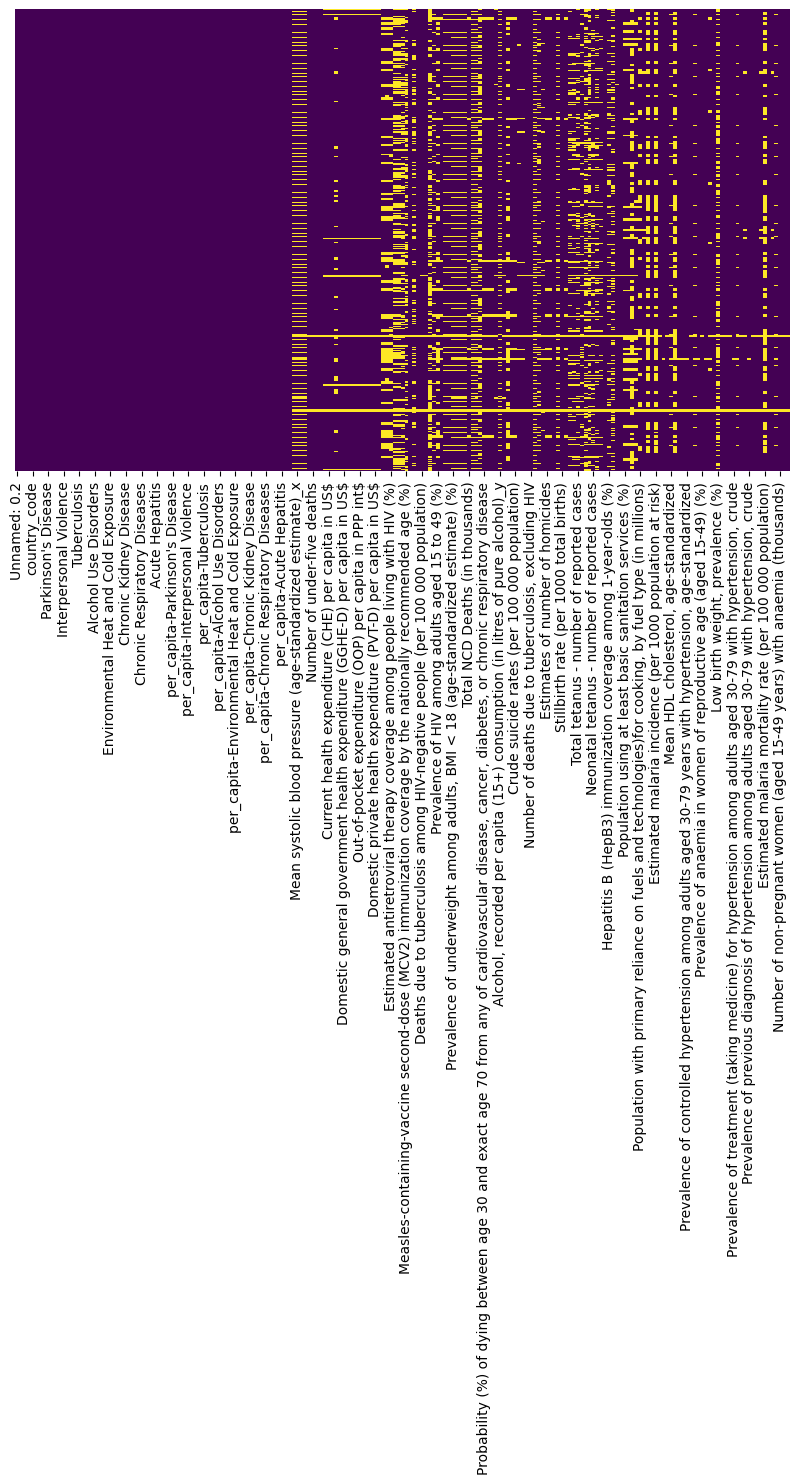

In [118]:
check_nan(data)

In [119]:
data['num_nan']=[sum([pd.isna(e) for e in fila]) for fila in data.itertuples()]

In [122]:
data["num_nan"].value_counts()[:20]

C:\Users\pabli\AppData\Local\Temp\ipykernel_4976\1447976458.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data["num_nan"].value_counts()[:20]


8     242
10    227
11    223
6     217
9     196
5     192
12    191
7     190
4     142
13    130
14    128
3     117
15    107
16     97
18     73
2      70
17     68
20     61
22     58
21     55
Name: num_nan, dtype: int64

In [136]:
data[data.num_nan>116].index

Int64Index([2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530,
            2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 3100, 3101,
            3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112,
            3113, 3114, 3115, 3116, 3117, 3118, 3119],
           dtype='int64')

In [143]:
data.loc[2538]

Unnamed: 0.2                                                                       2538
Unnamed: 0.1                                                                       2538
Unnamed: 0                                                                         2538
country                                                                     Puerto Rico
country_code                                                                        PRI
                                                                               ...     
Mean Non-HDL cholesterol, age-standardized                                          NaN
Number of non-pregnant women (aged 15-49 years) with anaemia (thousands)            NaN
Prevalence of anaemia in pregnant women (aged 15-49) (%)                            NaN
Mean hemoglobin level of non-pregnant women (aged 15-49 years)                      NaN
num_nan                                                                             120
Name: 2538, Length: 200, dtype: 

In [144]:
data.drop(data[data.num_nan>=116].index, axis=0, inplace=True)

'N nan cols: 94'

Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_x                             20.903955
Mean systolic blood pressure (age-standardized estimate)_x                                            20.903955
Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_y                             20.903955
Mean systolic blood pressure (age-standardized estimate)_y                                            20.903955
Current health expenditure (CHE) per capita in PPP int$                                                1.864407
                                                                                                        ...    
Proportion of population with primary reliance on polluting fuels and technologies for cooking (%)     1.694915
Prevalence of previous diagnosis of hypertension among adults aged 30-79 with hypertension, crude      0.564972
Population with primary reliance on clean fuels and technologies for cooking (in millions)             1

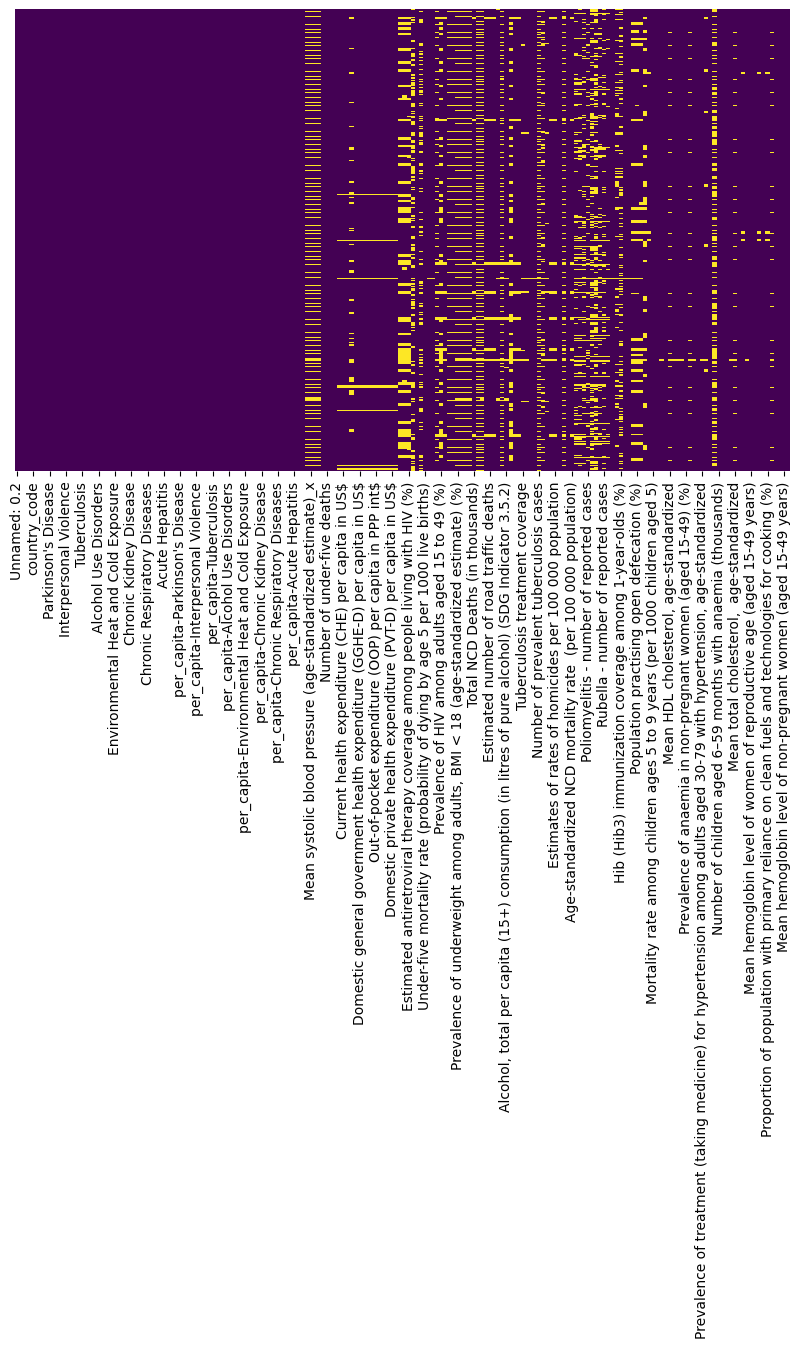

In [154]:
check_nan(data)

In [155]:
data.shape

(3540, 190)

In [180]:
nan_cols[nan_cols>20].index

Index(['Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_x',
       'Mean systolic blood pressure (age-standardized estimate)_x',
       'Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_y',
       'Mean systolic blood pressure (age-standardized estimate)_y',
       'Estimated number of people (all ages) living with HIV',
       'Number of people dying from HIV-related causes',
       'Estimated antiretroviral therapy coverage among people living with HIV (%)',
       'Measles-containing-vaccine second-dose (MCV2) immunization coverage by the nationally recommended age (%)',
       'Adolescent birth rate (per 1000 women aged 15-19 years)',
       'Prevalence of HIV among adults aged 15 to 49 (%)',
       'Mean fasting blood glucose (mmol/l) (age-standardized estimate)',
       'Raised fasting blood glucose (>=7.0 mmol/L) (age-standardized estimate)',
       'New HIV infections (per 1000 uninfected population)',
       'Number of prevalent t

In [185]:

data[data['Mumps - number of reported cases'].isna()==False]['Mumps - number of reported cases']

10         0.0
13         0.0
14         0.0
16        29.0
20      1651.0
         ...  
3575       0.0
3576      14.0
3577      18.0
3578       2.0
3579       8.0
Name: Mumps - number of reported cases, Length: 2200, dtype: float64

In [169]:
data[data["Yellow fever - number of reported cases"]> 0]["Yellow fever - number of reported cases"][:20]

C:\Users\pabli\AppData\Local\Temp\ipykernel_4976\43288909.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  data[data["Yellow fever - number of reported cases"]> 0]["Yellow fever - number of reported cases"][:20]


95       3.0
96     881.0
128      8.0
138      7.0
301      1.0
340     10.0
343     57.0
344     31.0
380      8.0
381      4.0
382     15.0
383      6.0
384     13.0
385     16.0
386     16.0
387      6.0
388      1.0
390      3.0
391      2.0
392      3.0
Name: Yellow fever - number of reported cases, dtype: float64

In [172]:
data["Yellow fever - number of reported cases"].info()

<class 'pandas.core.series.Series'>
Int64Index: 3540 entries, 0 to 3579
Series name: Yellow fever - number of reported cases
Non-Null Count  Dtype  
--------------  -----  
3540 non-null   float64
dtypes: float64(1)
memory usage: 55.3 KB


In [171]:
data["Yellow fever - number of reported cases"].fillna(0.0,inplace=True)

In [186]:
data['Mumps - number of reported cases'].fillna(0.0,inplace=True)

'N nan cols: 92'

Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_x                             20.903955
Mean systolic blood pressure (age-standardized estimate)_x                                            20.903955
Raised blood pressure (SBP>=140 OR DBP>=90) (age-standardized estimate)_y                             20.903955
Mean systolic blood pressure (age-standardized estimate)_y                                            20.903955
Current health expenditure (CHE) per capita in PPP int$                                                1.864407
                                                                                                        ...    
Proportion of population with primary reliance on polluting fuels and technologies for cooking (%)     1.694915
Prevalence of previous diagnosis of hypertension among adults aged 30-79 with hypertension, crude      0.564972
Population with primary reliance on clean fuels and technologies for cooking (in millions)             1

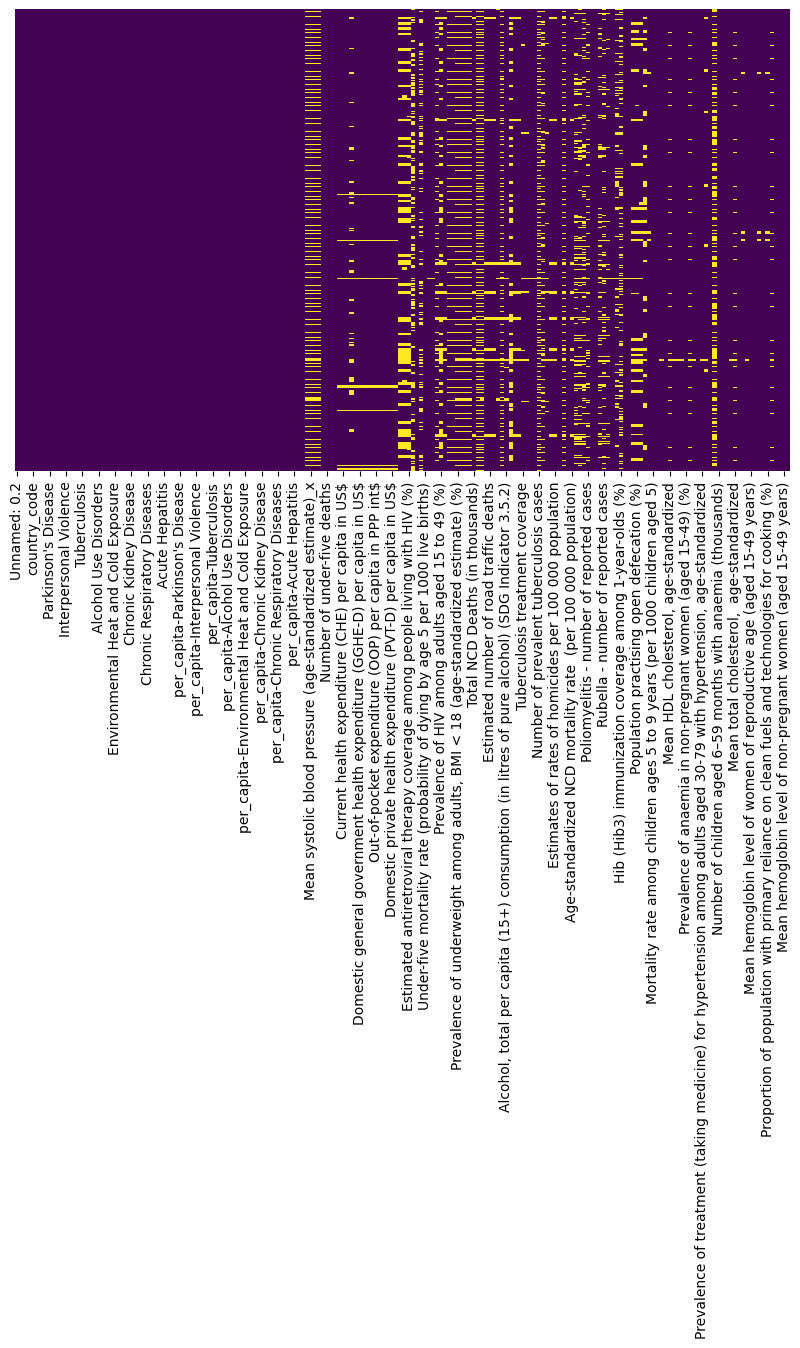

In [187]:
check_nan(data)